## Here is the TPP 11. The content of TPP10 is based on the results of TPP8, 9&10, I'll use a prominent sign to indicate where to start for TPP10.

In [1]:
# import Numpy, Pandas
import time
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from pandas.core.frame import DataFrame
from matplotlib.pyplot import MultipleLocator

In [2]:
# load the all data to a dictionary
path = ('resources/Participant-01.csv')
data_file = pd.read_csv(path)

In [3]:
# show brief information of dataframe
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5867 entries, 0 to 5866
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Start          5867 non-null   object 
 1   Finish         5867 non-null   object 
 2   Steps (count)  5867 non-null   float64
dtypes: float64(1), object(2)
memory usage: 137.6+ KB


In [4]:
# display the complete imported data
print(data_file)

                  Start             Finish  Steps (count)
0     31-Dec-2021 23:00  01-Jan-2022 00:00       0.000000
1     01-Jan-2022 00:00  01-Jan-2022 01:00       0.000000
2     01-Jan-2022 01:00  01-Jan-2022 02:00       0.000000
3     01-Jan-2022 02:00  01-Jan-2022 03:00       0.000000
4     01-Jan-2022 03:00  01-Jan-2022 04:00       0.000000
...                 ...                ...            ...
5862  02-Sep-2022 04:00  02-Sep-2022 05:00       9.000000
5863  02-Sep-2022 05:00  02-Sep-2022 06:00       0.000000
5864  02-Sep-2022 06:00  02-Sep-2022 07:00     410.584935
5865  02-Sep-2022 07:00  02-Sep-2022 08:00    1153.415065
5866  02-Sep-2022 08:00  02-Sep-2022 09:00       1.000000

[5867 rows x 3 columns]


This step is to clean the data. My criterion for judging whether the data is valuable is that the data cannot be 0.

In [5]:
# Delete all rows where Steps (count) is 0
data_file = data_file.drop(data_file[data_file['Steps (count)'] == 0].index)

In the following cells, I extracted the middle point of each valid time period to facilitate the drawing of statistical graphs.

In [6]:
# Two functions to define the midpoint of a date
def get_time(DateTime):
    DateTime = datetime.strptime(DateTime,'%d-%b-%Y %H:%M')
    return DateTime

def mid_point(start, finish):
    start, finish = get_time(start), get_time(finish)
    return start+(finish-start)/2

In [7]:
# Process the Start and Finish columns
count_list, count = [], 0
for m in data_file['Start']:
    count_list.append(m)
for n in data_file['Finish']:
    count_list[count] = count_list[count]+"/"+n
    count+=1

At this point, the middle point and the corresponding count() are all there, and they are made into a DataFrame.

In [8]:
# Make new DataFrame with mid and count
mids, steps = [], []
for i in count_list:
    start, finish = i.split("/")
    mid = mid_point(start, finish)
    mids.append(mid)
for i in data_file['Steps (count)']:
    steps.append(i)
mid_step = {
    "mid": mids,
    "steps": steps
}
mid_step = DataFrame(mid_step)

Text(0, 0.5, 'Count')

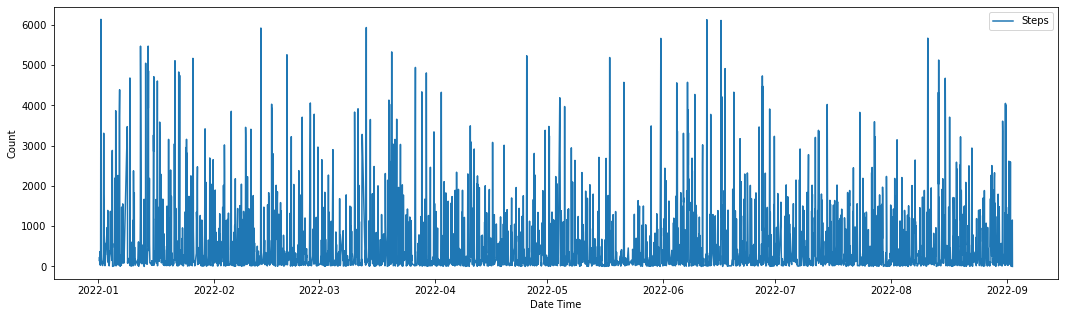

In [9]:
# Draw the graph based on mid and steps
plt.figure(figsize=(18,5))
mid_step = mid_step.sort_values('mid', ascending=True)
plt.plot(mid_step['mid'], mid_step['steps']) # add text labels to the plot
plt.legend(["Steps"])
plt.xlabel('Date Time')
plt.ylabel('Count')

Next, get the day of the week this date is. Make a DateFrame for each day of the week.

In [10]:
# other dataframes from weekdays
mid_weekday_all = []
for m in mids:
    n = m.weekday()
    mid_weekday_all.append(n)

mid_weekday_step = {
    "mid_weekday" : mid_weekday_all,
    "steps" : steps
}

mid_weekday_step = DataFrame(mid_weekday_step)

In [11]:
# Separate the data according to the day of the week.
names = locals()  # call dynamic variable name
for i in range(1,8):
    item = mid_weekday_step[mid_weekday_step.mid_weekday == i]
    names['mid_' + str(i) ] = item

In the next two cells, I first separated the DataFrame, changed them one by one, and then merged them together.

In [12]:
# This step should be written concisely, I will improve it later.
mid_1 = mid_1.rename(columns = {'steps':'Mon'}).reset_index(drop=True)
mid_2 = mid_2.rename(columns = {'steps':'Tue'}).reset_index(drop=True)
mid_3 = mid_3.rename(columns = {'steps':'Wed'}).reset_index(drop=True)
mid_4 = mid_4.rename(columns = {'steps':'Thu'}).reset_index(drop=True)
mid_5 = mid_5.rename(columns = {'steps':'Fri'}).reset_index(drop=True)
mid_6 = mid_6.rename(columns = {'steps':'Sat'}).reset_index(drop=True)
mid_7 = mid_7.rename(columns = {'steps':'Sun'}).reset_index(drop=True)

In [13]:
# Aggregate the DataFrame of each day of the week into a DataFrame.
final = pd.concat([mid_1['Mon'],\
                   mid_2['Tue'],\
                   mid_3['Wed'],\
                   mid_4['Thu'],\
                   mid_5['Fri'],\
                   mid_6['Sat'],\
                   mid_7['Sun'],], axis = 1)

<AxesSubplot:>

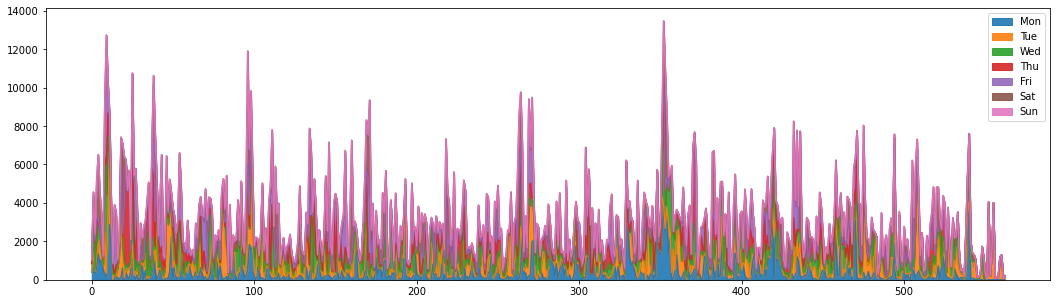

In [14]:
# show the plot
final.plot.area(stacked=True,alpha = 0.9, figsize=(18,5))

I also tried other types of charts, but none worked as well as this stacked area chart.

In general, the number of steps of the study subjects changed with the change of the week, but the details still need to be analyzed in detail, and the code needs to be more targeted.

# Work for TPP 9 stsrts from here.

First, with the help of two functions, I first determine the data spanning several weeks in time, and which week each date belongs to.

In [15]:
def week_num(week_start, week_end):

    year_week_num = 52    # print(datetime.strftime(datetime(2020, 12, 31), "%W"))
    week_end_year = week_end.year
    week_start_year = week_start.year
    week_end_num = int(datetime.strftime(week_end, "%W"))
    week_start_num = int(datetime.strftime(week_start, "%W"))

    return (week_end_year - week_start_year) * year_week_num + week_end_num - week_start_num

In [16]:
def week_num_1(start_time, end_time):
    week_start = datetime.strptime(start_time, '%Y-%m-%d')
    week_end = datetime.strptime(end_time, '%Y-%m-%d')

    # method 1:
    # year_week_num = 53      # print(datetime(2020, 12, 31).isocalendar())
    # week_start_year, week_start_num, _ = week_start.isocalendar()    #  (year, week of the year, day of the week)
    # week_end_year, week_end_num, _ = week_end.isocalendar()     # 53-->52

    # method 2:
    year_week_num = 52    # print(datetime.strftime(datetime(2020, 12, 31), "%W"))
    week_end_year = week_end.year
    week_start_year = week_start.year
    week_end_num = int(datetime.strftime(week_end, "%W"))
    week_start_num = int(datetime.strftime(week_start, "%W"))

    return (week_end_year - week_start_year) * year_week_num + week_end_num - week_start_num
    
# print(week_num_1("2022-9-30", "2022-10-6"))

In [17]:
week_count_list = []
for i in mids:
    week_count = week_num(mids[0], i)
    week_count_list.append(week_count)

In [18]:
mid_day_weekday_step = {
    "date" : mids,
    "week" : week_count_list,
    "weekday" : mid_weekday_all,
    "steps" : steps
}
mid_day_weekday_step = DataFrame(mid_day_weekday_step)

Next, I used Group By to group the DataFrame by week. Group By in Pandas has the same usage as Group By in Sql.

In [19]:
step_groupby_week = mid_day_weekday_step.groupby("week").agg('sum')  # if no agg, returns memory address.

(1.0, 36.0)

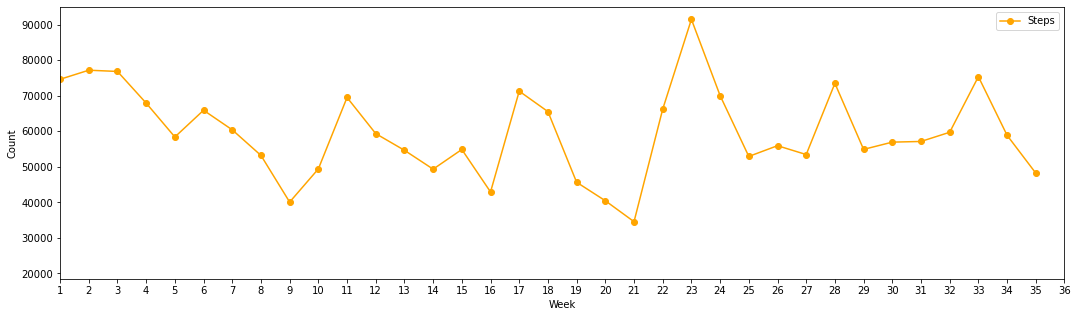

In [20]:
plt.figure(figsize=(18,5))
step_groupby_week = step_groupby_week.sort_values('week', ascending=True)
plt.plot(step_groupby_week.index, step_groupby_week['steps'], color="orange",marker="o") # add text labels to the plot
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(1,36)  # Set the coordinate range

I will complete my Sub-Question research in this TPP. My Sub-Question is: Is there a correlation between the number of steps per week in the volunteer I studied and the percentage of public rest days in the week?

To research this Sub-Question, I first downloaded a csv file of all holidays for 2022 from the Australian Government website.

In [21]:
# load the sub_question data to a dictionary
sub_path = ('resources/australian-public-holidays-combined-2022.csv')
sub_data_file = pd.read_csv(sub_path)

In [22]:
# Refine data, remove unnecessary columns.
sub_data_file_clean = sub_data_file.drop('_id', axis = 1).\
                                    drop('Information', axis = 1).\
                                    drop('More Information', axis = 1)
# Deletion of data outside of New South Wales
sub_data_file_nsw = sub_data_file_clean.drop(sub_data_file_clean[sub_data_file_clean['Jurisdiction'] != 'nsw'].index)

After data cleaning, I got a DataFrame as below.

In [23]:
# Refined data look like
print(sub_data_file_nsw)

        Date                                       Holiday Name Jurisdiction
15  20220101                                     New Year's Day          nsw
16  20220103                    New Year's Day (additional day)          nsw
17  20220126                                      Australia Day          nsw
18  20220415                                        Good Friday          nsw
19  20220416  Easter Saturday - the Saturday following Good ...          nsw
20  20220417                                      Easter Sunday          nsw
21  20220418                                      Easter Monday          nsw
22  20220425                                          Anzac Day          nsw
23  20220613                                   Queen's Birthday          nsw
24  20220801                                       Bank Holiday          nsw
25  20221003                                         Labour Day          nsw
26  20221225                                     Christmas Day           nsw

In [24]:
# Another function to define the midpoint of a date
def get_sub_time(DateTime):
    DateTime = datetime.strptime(DateTime,'%Y%m%d')
    return DateTime

In [25]:
holidays = []
for i in sub_data_file_nsw['Date']:
    sub_date = get_sub_time(str(i))
    sub_week_count = week_num(mids[0], sub_date)
    if int(sub_week_count) <=36:  # Delete data from days that have not yet come
        holidays.append(sub_week_count)

In [26]:
sub_week = [i for i in range(0,36)]

In [27]:
sub_prop, week_count = [], 0
while week_count < 36:
    if week_count in holidays:
        sub_prop.append(float(3/7))
    else:
        sub_prop.append(float(2/7))
    week_count += 1

In [28]:
holiday_data = {
    "week" : sub_week,
    "Proportion" : sub_prop
}
holiday_data = DataFrame(holiday_data)

In order to see the possible connection between the two more clearly, I put the two plots in the same figure. They share an abscissa and have their own ordinate.

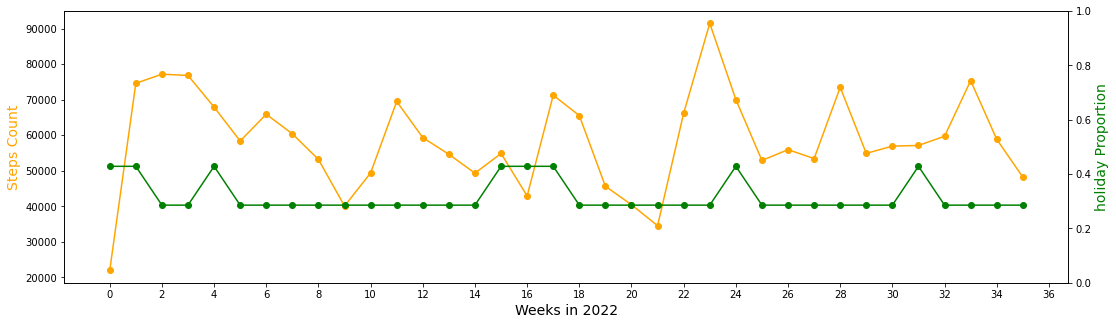

In [29]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(18,5))
# make a plot
ax.plot(step_groupby_week.index, 
        step_groupby_week['steps'],
        color="orange", 
        marker="o")
# set x-axis label
ax.set_xlabel("Weeks in 2022", fontsize = 14)
# set y-axis label
ax.set_ylabel("Steps Count",
              color="orange",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(holiday_data['week'], holiday_data['Proportion'],color="green",marker="o")
ax2.set_ylabel("holiday Proportion",color="green",fontsize=14)
plt.ylim((0, 1))  # Set the interval of the second y coordinate between 0-1

x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

As can be seen from the above figure, the relationship between the volunteer's weekly steps and the proportion of public rest days in this week is not very obvious. I think this volunteer is most likely a student, so its days off are not fixed and there are many ways to spend them (maybe staying at home, maybe going out on a hike, for example).

#  Work for TPP 11 stsrts from here.

Next I will introduce the data of a participant other than participant 1 and visualize it to see if it fits my previous sub-question's conclusion.

I chose the steps of the 7th participant as additional data for my sub-question.

In [68]:
# load the additional data to a dictionary
path_add = ('resources/Participant-07.csv')
data_file_add = pd.read_csv(path_add)

The next step was to take everything I had done with the first dataset in the previous weeks and do it again with this new dataset. So there's not much to explain.

In [69]:
# Delete all rows where Steps (count) is 0
data_file_add = data_file_add.drop(data_file_add[data_file_add['Steps (count)'] == 0.0].index)

In [70]:
# Process the Start and Finish columns
count_list_add, count_add = [], 0
for m in data_file_add['Start']:
    count_list_add.append(m)
for n in data_file_add['Finish']:
    count_list_add[count_add] = count_list_add[count_add]+"/"+n
    count_add+=1

In [74]:
# Make new DataFrame with mid and count
mids_list_add, steps_add = [], []
for i in count_list_add:
    start, finish = i.split("/")
    mid_add = mid_point(start, finish)
    mids_list_add.append(mid_add)
for i in data_file_add['Steps (count)']:
    steps_add.append(i)
mid_step_add = {
    "mid": mids_list_add,
    "steps": steps_add
}
mid_step_add = DataFrame(mid_step_add)

Text(0, 0.5, 'Count')

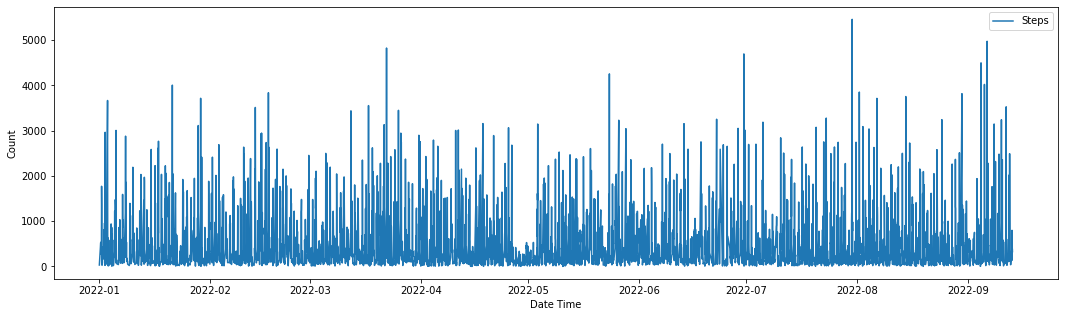

In [75]:
# Draw the graph based on mid and steps
plt.figure(figsize=(18,5))
mid_step_add = mid_step_add.sort_values('mid', ascending=True)
plt.plot(mid_step_add['mid'], mid_step_add['steps']) # add text labels to the plot
plt.legend(["Steps"])
plt.xlabel('Date Time')
plt.ylabel('Count')

In [76]:
week_count_list_add = []
for i in mids_list_add:
    week_count_add = week_num(mids_list_add[0], i)
    week_count_list_add.append(week_count_add)

In [77]:
# other dataframes from weekdays
mid_weekday_all_add = []
for m in mids_list_add:
    n = m.weekday()
    mid_weekday_all_add.append(n)

In [78]:
mid_day_weekday_step_add = {
    "date" : mids_list_add,
    "week" : week_count_list_add,
    "weekday" : mid_weekday_all_add,
    "steps" : steps_add
}
mid_day_weekday_step_add = DataFrame(mid_day_weekday_step_add)

In [79]:
step_groupby_week_add = mid_day_weekday_step_add.groupby("week").agg('sum')

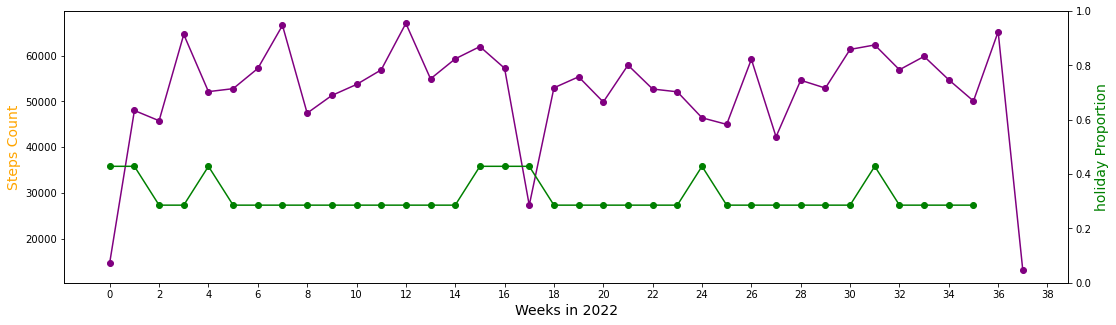

In [87]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(18,5))
# make a plot
ax.plot(step_groupby_week_add.index, 
        step_groupby_week_add['steps'],
        color="purple", 
        marker="o")
# set x-axis label
ax.set_xlabel("Weeks in 2022", fontsize = 14)
# set y-axis label
ax.set_ylabel("Steps Count",
              color="orange",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(holiday_data['week'], holiday_data['Proportion'],color="green",marker="o")
ax2.set_ylabel("holiday Proportion",color="green",fontsize=14)
plt.ylim((0, 1))  # Set the interval of the second y coordinate between 0-1

x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

Next, I would like to put the three charts in one chart. This will make it a little bit clearer to see.

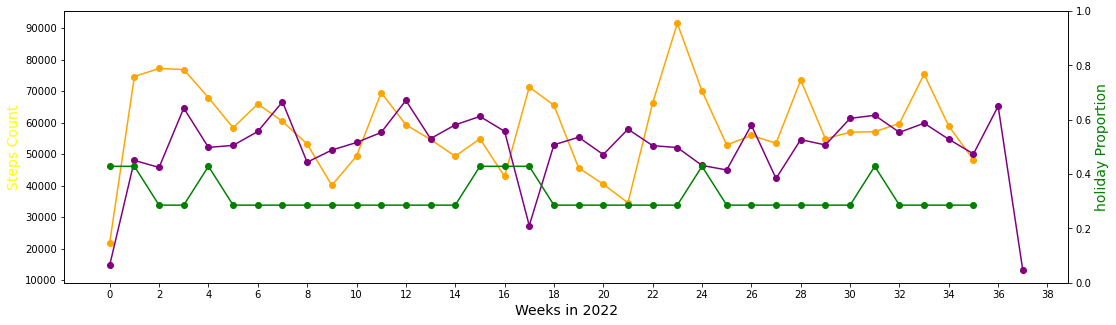

In [90]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(18,5))
# make a plot
ax.plot(step_groupby_week.index, 
        step_groupby_week['steps'],
        color="orange", 
        marker="o")
ax.plot(step_groupby_week_add.index, 
        step_groupby_week_add['steps'],
        color="purple", 
        marker="o")
# set x-axis label
ax.set_xlabel("Weeks in 2022", fontsize = 14)
# set y-axis label
ax.set_ylabel("Steps Count",
              color="yellow",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(holiday_data['week'], holiday_data['Proportion'],color="green",marker="o")
ax2.set_ylabel("holiday Proportion",color="green",fontsize=14)
plt.ylim((0, 1))  # Set the interval of the second y coordinate between 0-1

x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

## Conclusion:
Now, according to the above chart, I can finally be sure: the number of steps per week and the days off this week really have nothing to do with each other. 